# Matemática Computacional I
- Prof. Felipe C. Minuzzi
- felipe.minuzzi@ufsm.br

## Interpolação polinomial

A interpolação polinomial é um método de aproximação de funções por polinômios. A interpolação é utilizada quando se conhece apenas alguns pontos da função ou quando a função é muito complicada e difícil de manejar. Os polinômios têm a vantagem de serem fáceis de derivar e integrar. Além disso, é possível provar que qualquer função contínua pode ser arbitrariamente aproximada por um polinômio (teorema de Weierstrass).

Interpolar uma função $y = f(x)$ em um conjunto de $n+1$ pontos distintos ${x_0,x_1,...,x_n}$ de um intervalo $[a,b]$ por um polinômio de significa encontrar 

$$P_n(x)= a_0 + a_1x+...+ax^n$$ 

tal que $P(x_i)=y_i$ com  $i = 0,1,...,n$. Ou seja, significa encontrar o polinômio de grau $n$ que "passa" por  esses pontos.

Na figura abaixo é mostrada um polinômio que interpola uma função a partir de 6 pontos. É possível observar que o polinômio passa pelos pontos, ou seja, $P(x_i) = y_i$, $i=0,1,...,5$, e que aproxima a função razoavelmente bem a função no intervalo de $x_1$ até $x_5$. No intervalo entre $x_0$ e $x_1$ a aproximação não é tão boa e fora do intervalo $(x_0,x_5)$ parece não funcionar muito bem.   

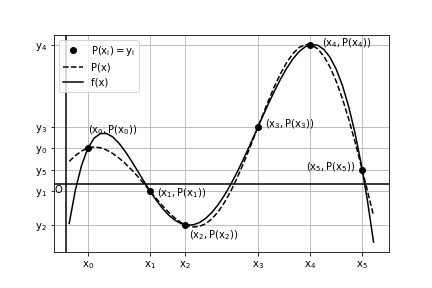


O caso mais simples de interpolação que podemos analisar é o de encontrar a reta (polinômio de grau 1) que passa por dois pontos, $(x_0, y_0)$ e $(x_1,y_1)$. Nesse caso, o polinômio tem a forma $P(x)=a_0+a_1x$ e para determiná-lo basta encontrar os coeficientes $a_0$ e $a_1$ da única reta que passa por esses dois pontos. Logo, os coeficientes podem ser obtidos resolvendo o sistema linear:

$$\begin{cases}
       y_0 = a_0 + a_1 x_0\\
       y_1 = a_0 + a_1 x_1\\
\end{cases}$$

ou, na forma matricial

$$\begin{bmatrix}
          1 & x_0 \\
	      1 & x_1 \\
\end{bmatrix}
\begin{bmatrix}
          a_0 \\
	      a_1 \\
\end{bmatrix}
=
\begin{bmatrix}
          y_0 \\
	      y_1 \\
\end{bmatrix}$$

A solução pode ser obtida fazendo $a_1 = \frac{y_1 - y_0}{x_1 - x_0}$ e $a_0 = y_0 - a_1x_0$.




Vamos obter o polinômio que interpola os pontos ${(1,2),(5,1)}$.<br>
_Solução:_
Para isso, resolvemos o sistema linear
$$ \begin{cases}
	         a_0 + a_1 = 2\\
	         a_0 + 5a_1 = 1\\
	         \end{cases} $$
que nos fornece:

$a_1=\frac{y_1 - y_0}{x_1 - x_0}=\frac{1 - 2}{5 - 1}=-\frac{1}{4}$
e
$a_0 = y_0 - a_1x_0 = 2 +\frac{1}{4} = \frac{9}{4}$

Assim, obtemos

$$P(x)= \frac{9}{4}-\frac{1}{4}x$$

A figura abaixo mostra o resultado

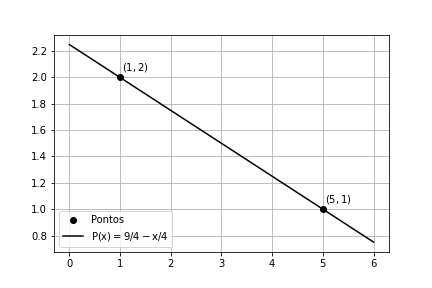

Assim, generalizando o caso anterior, para obter os coeficientes do polinômio $P(x)=a_0 + a_1x + a_2x^2+...+a_nx^n$, de grau $n$, que interpola uma função a partir de $n+1$ pontos $(x_i,y_i)$, $i=0,1,...,n$, podemos resolver o seguinte sistema

$$\begin{bmatrix}
          1 & x_0 & x_0^2 & ... & x_0^n\\
	      1 & x_1 & x_1^2 & ... & x_1^n\\
          ...& ... & ... & ... & ...\\
          1 & x_n & x_n^2 & ... & x_n^n\\
\end{bmatrix} 

\begin{bmatrix}
          a_0 \\
	      a_1 \\
          ...\\
          a_n \\
\end{bmatrix} 

=

\begin{bmatrix}
          y_0 \\
	      y_1 \\
          ...\\
          y_n \\
\end{bmatrix}$$

A matriz $n \times n$ mostrada acima é chamada matriz de Vandermonde e tem determinante não nulo para pontos $x_i$ distintos, ou seja, polinômio de coeficientes $a_0,a_1,...,a_n$ existe e é único. 


**Exemplo 1**

Considere o problema de encontrar um polinômio interpolador para do conjunto de pontos $\{(0, 1)$, $(1, 6)$, $(2, 5)$, $(3, -8)\}$. Como o conjunto consiste de 4 pontos, o polinômio interpolador deve ser da forma: $p(x) = a_0 + a_1x + a_2x^2 + a_3x^3$

O que nos leva ao sistema linear:

$$\begin{cases}
    a_0=1\\
    a_0+a_1+a_2+a_3=6\\
    a_0+2a_1+4a_2+ 8a_3=5\\
    a_0+3a_1+9a_2+27a_3=-8
\end{cases} $$

cuja solução é $a_0=1$, $a_1=6$, $a_2=0$ e $a_3=-1$. Portanto, o polinômio interpolador é $p(x)=1+6x-x^3$.

Podemos verificar o resultado plotando os pontos e o polinômio:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
xi = np.array([0.,1.,2.,3.])
yi = np.array([1.,6.,5.,-8.])

x = np.linspace(-1,4)
y = 1+6*x-x**3

plt.plot(xi,yi,'ro',x,y,'k-')
plt.grid()

Computacionalmente, podemos resolver esse exemplo como é mostrado a seguir, utilizando as operações vetorizadas da biblioteca `numpy` para montar a matriz do sistema e a função `solve` do módulo `linalg` para resolver, assim obtemos facilmente os coeficientes do polinômio interpolador. Também podemos usar a conveniente função `polyval` para avaliar o valores do polinômio em um conjunto de valores de $x$. Faremos isso para verificar se correspondem aos valores da função, como é esperado, ou seja, se $P(x_i)=y_i$, $i=0,1,2,3$.





In [ ]:
A  = np.polynomial.polynomial.polyvander(xi,3)
ai = np.linalg.solve(A,yi)

print ("Coeficientes do polinômio:", ai)

### Fórmula Interpolatória de Lagrange

Seja $f(x)$ definida em $x_0, x_1,...,x_n$, $(n+1)$ pontos distintos de um intervalo $[a,b]$ e $y_i=f(x_i)$, $i=0,1,...,n$, então o polinômio interpolador de Lagrange é dado por

$$P(x)=\sum_{k=0}^{n} y_k L_k(x) $$

com

$$ L_k(x) = \prod_{j=0 e j\neq k}^{n} \frac{(x-x_j)}{(x_k-x_j)}$$

**Exemplo 2**

Considere a função $f(x)$ definida nos pontos $\{(0.0, 1.9), (1.5, 2.5), (2.0, 0.9)\}$. Determine o polinômio interpolador, usando a fórmula de Lagrange, e estime $f(0.9)$.

*Solução:* Queremos o polinômio na forma $P(x) = y_0 L_0(x) + y_1 L_1(x) + y_2 L_2(x)$. Então, obtemos os $L_k(x)$ fazendo

$L_0 = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} = \frac{(x-1,5)(x-2,0)}{(0,0-1,5)(0,0-2,0)} =
\frac{x^2 - 3,5x + 3,0}{3,0}$

$L_1 = \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}=\frac{(x-0,0)(x-2,0)}{(1,5-0,0)(1,5-2,0)}=\frac{x^2-1,5x}{1,0}$

$L_2 = \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}=\frac{(x-0,0)(x-1,5)}{(2,0-0,0)(2,0-1,5)}=\frac{x^2-1,5x}{1,0}$

Assim,
$P(x)=1,9 \left(\frac{x^2 - 3,5x + 3,0}{3,0}\right) + 2,5 \left( \frac{x^2-1,5x}{1,0}\right) + 0.9 \left( \frac{x^2-1,5x}{1,0}\right) = -1,8x^2 + 3,1x + 1,9$

Portanto, tem-se

$P(0.9) = -1,8(0,9)^2 - 3,1(0,9) + 1,9 = 3,2320$.

O script Python abaixo plota o gráfico do polinômio obtido juntamente com os pontos tabelados.

In [ ]:
x = [0.0, 1.5, 2.0]
y = [1.9, 2.5, 0.9]

def P(x):
  return -1.8*x**2 + 3.1*x + 1.9
# ou
#P = lambda x: -1.8*x**2 + 3.1*x + 1.9

xi= np.linspace(-0.2, 2.2)
plt.plot(x, y, 'ro', xi, P(xi),'k-')

plt.grid()
plt.show()

In [ ]:
P = lambda x: -1.8*x**2 + 3.1*x + 1.9
P(0.9)

No código abaixo, é mostrada a função `calculaP`, a qual calcula o valor numérico do polinômio interpolador em um ponto `x` usando a fórmula de Lagrange. 

Usando essa função vamos calcular o valor de $P(9)$ e, também, fazer um laço de repetição para calcular o calor do polinômio em um conjunto de pontos para construir um gráfico. 

Observe que, como é esperado, o gráfico é igual ao do polinômio que foi obtido analiticamente no **exemplo 2**.

In [ ]:
def calculaP(x,X,Y):
    valor = 0
    for k in range(len(X)):
        lk = 1.0
        for i in range(len(X)):
            if k != i:
                lk = lk*(x - X[i])/(X[k]-X[i])
        valor = valor + Y[k]*lk
    return valor

In [ ]:
xi = [0.0, 1.5, 2.0]
yi = [1.9, 2.5, 0.9]

x0 = 1.7

#aqui, usamos a função para interpolar o ponto x0 apenas
calculaP(x0, xi, yi)

In [ ]:
#agora, vamos construir um processo iterativo para interpolar vários pontos de um domínio,
#e com isso obter vários valores interpolados, o que nos permite gerar um gráfico.

xp = np.linspace(xi[0], xi[-1])
yp = []

for x in xp:
     y = calculaP(x, xi, yi)
     yp.append(y)

plt.plot(xi, yi, 'or', xp, yp,'-k')
plt.grid()
plt.show()

print ("P(",0.9,") =", calculaP(0.9, xi,yi))

**Exemplo 3:** 

Considere a função 

$$f(x)= \frac{0,2x^2sen(x)}{ln\left[(1+x)^2 \right]}$$ 

definida em seis pontos igualmente espaçados tais que $x_0=0.5$ e $x_5=5.5$. 

Vamos usar a função criada acima para plotar o gráfico do polinômio interpolador de Lagrage juntamente com o gráfico da função e os pontos utilizados.


In [ ]:
f = lambda x: (0.2*x**2*np.sin(x))/np.log((1 + x)**2)
xi = np.linspace(0.5,5.5,6)
yi = f(xi)

xp = np.linspace(0.1, 6)
yp = []
for x in xp:
    y = calculaP(x, xi, yi)
    yp.append(y)

plt.plot(xi, yi, 'or',
         xp, yp,'-k')
      #   xp,f(xp),'--k')
plt.grid()
plt.show()